In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler

In [3]:
df=pd.read_csv("Employee.csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [5]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


In [6]:
print("\nStatistical summary\n")
print(df.describe())


Statistical summary

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [7]:
df.rename(columns={'Place': 'City'}, inplace=True)

In [9]:
df['Age'] = df['Age'].replace(0, np.nan)

In [10]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      148 non-null    float64
 2   Salary   148 non-null    float64
 3   City     134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   City     130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB
None


In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Salary')

In [17]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print("\nFiltered Data:")
print(filtered_df)


Filtered Data:
     Company   Age  Salary       City Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


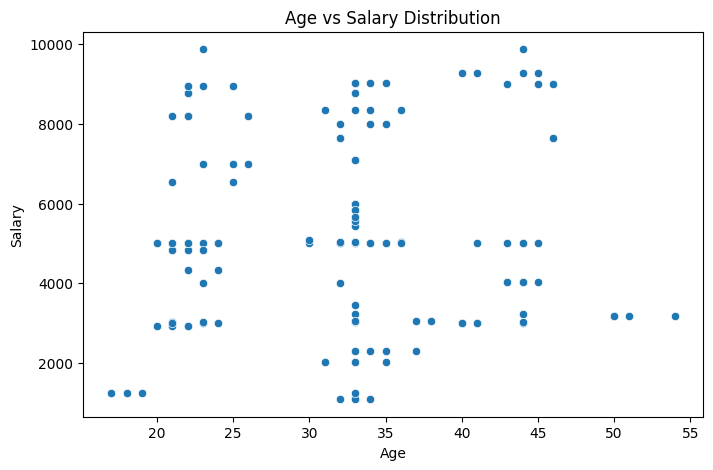

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary Distribution')
plt.show()

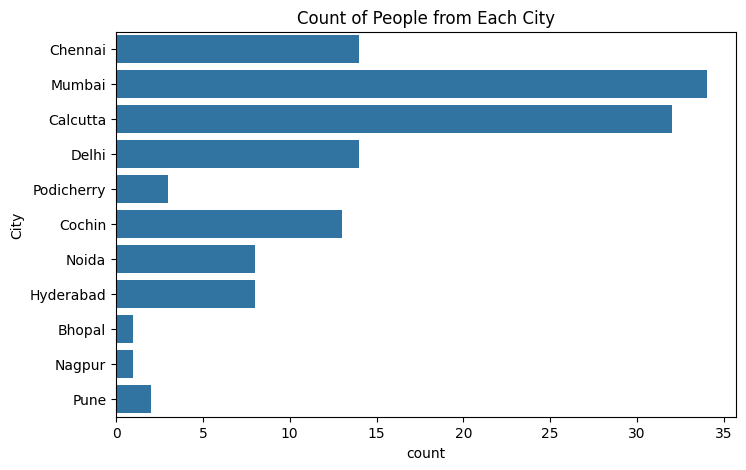

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['City'])
plt.title('Count of People from Each City')
plt.show()

In [26]:
categorical_cols = ['Gender', 'City']  
encoder = OneHotEncoder()
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [29]:
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
scaler_standard = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler_standard.fit_transform(df_encoded[numeric_cols])
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df_encoded.copy()
df_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(df_encoded[numeric_cols])

print("\nPreprocessed Data:")
print(df_scaled.head())


Preprocessed Data:
   Company       Age    Salary Country  Gender_0  Gender_1  City_Bhopal  \
0      TCS -1.484676 -0.100827   India      True     False        False   
1  Infosys -0.267174 -0.100827   India      True     False        False   
2      TCS  0.341577 -1.243735   India      True     False        False   
3  Infosys  0.950328 -0.947426   India      True     False        False   
4      TCS -1.119426 -0.524127   India      True     False        False   

   City_Calcutta  City_Chennai  City_Cochin  City_Delhi  City_Hyderabad  \
0          False          True        False       False           False   
1          False         False        False       False           False   
2           True         False        False       False           False   
3          False         False        False        True           False   
4          False         False        False       False           False   

   City_Mumbai  City_Nagpur  City_Noida  City_Podicherry  City_Pune  
0       